## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

1. Dataset yang digunakan dalam penelitian ini merupakan data analisis sentimen pada teks keuangan (financial sentiment analysis) yang bersumber dari Kaggle. Kasus yang diambil berfokus pada pengenalan sentimen dalam konteks keuangan, seperti berita ekonomi, laporan perusahaan, dan informasi pasar saham. Tujuan utama dari penggunaan dataset ini adalah untuk mengidentifikasi bagaimana suatu pernyataan atau kalimat mencerminkan persepsi positif, negatif, atau netral terhadap kondisi keuangan atau pasar. Dengan demikian, analisis ini dapat membantu memahami reaksi pasar terhadap berita atau laporan tertentu yang berkaitan dengan ekonomi dan bisnis.

2. Dataset ini terdiri dari dua kolom utama, yaitu sentence dan sentiment. Kolom sentence berisi teks atau kalimat yang diambil dari berbagai sumber keuangan, seperti artikel berita, laporan keuangan, dan pernyataan publik mengenai pasar saham. Sementara itu, kolom sentiment merupakan label yang menunjukkan kecenderungan emosi dari kalimat tersebut. Nilai sentimen terbagi menjadi tiga kategori, yaitu positive, negative, dan neutral. Sentimen positive menunjukkan pernyataan yang mengandung optimisme atau kondisi yang menguntungkan; negative mencerminkan situasi kerugian atau pandangan pesimis; sedangkan neutral bersifat informatif tanpa menunjukkan arah emosi tertentu.

In [1]:
!pip install transformers emoji nltk matplotlib seaborn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 24.2 MB/s eta 0:00:00


In [2]:
# Untuk Pengolahan Kata
from transformers import pipeline
import emoji
import re
import nltk
from nltk.corpus import stopwords, words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline

# Untuk pre processing data
from sklearn.model_selection import train_test_split

# Untuk Pemodelan
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import numpy as np
import pandas as pd

import os

In [3]:
df = pd.read_csv("./sample_data/data.csv")

In [4]:
df[['Sentence', 'Sentiment']].head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

1. Jumlah Baris Data

In [68]:
print("Jumlah baris dan kolom data:")
print(df.shape)

Jumlah baris dan kolom data:
(5842, 12)


2. Panjang Rata-rata Setiap Baris

In [69]:
df['text_length'] = df['Sentence'].apply(lambda x: len(str(x).split()))
rata_rata = df['text_length'].mean()

print(f"Panjang rata-rata setiap baris teks: {rata_rata:.2f} kata")

Panjang rata-rata setiap baris teks: 21.00 kata


3. Cek Data Duplikasi

In [116]:
duplikat = df.duplicated(subset=['Sentence']).sum()
print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 0


4. Cek Data Kosong

In [112]:
print(df.isna().sum())
print(df.isnull().sum())

Sentence                     0
Sentiment                    0
text_length                  0
Sentence_tokens              0
lemmatized_tokens            0
stemmed_tokens               0
cleaned_tokens               0
normalized_tokens            0
vader_scores                 0
sentiment_label           2897
normalized_text_string       0
sentiment_numeric         2897
dtype: int64
Sentence                     0
Sentiment                    0
text_length                  0
Sentence_tokens              0
lemmatized_tokens            0
stemmed_tokens               0
cleaned_tokens               0
normalized_tokens            0
vader_scores                 0
sentiment_label           2897
normalized_text_string       0
sentiment_numeric         2897
dtype: int64


5. Distribusi Data

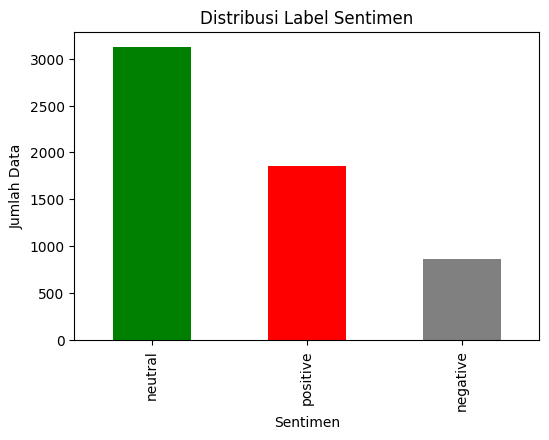

In [79]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribusi Label Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()


## Data Text Processing

In [10]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

1. Tokenisasi

In [82]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')


In [83]:
df['Sentence_tokens'] = df['Sentence'].apply(lambda x: tokenizer.tokenize(str(x)))

print("Tokenisasi kolom 'Sentence':")
display(df[['Sentence', 'Sentence_tokens']].head())


Tokenisasi kolom 'Sentence':


,Sentence,Sentence_tokens
0,The GeoSolutions technology will leverage Bene...,"[The, GeoSolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, on, lows, down, 1, 50, to, 2, 50, BK, a,..."
2,"For the last quarter of 2010 , Componenta 's n...","[For, the, last, quarter, of, 2010, Componenta..."
3,According to the Finnish-Russian Chamber of Co...,"[According, to, the, Finnish, Russian, Chamber..."
4,The Swedish buyout firm has sold its remaining...,"[The, Swedish, buyout, firm, has, sold, its, r..."


2. Lemmatization

In [84]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("running", pos="v"))
print(lemmatizer.lemmatize("better", pos="a"))


run
good


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [85]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [86]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def safe_lemmatize(tokens):
    result = []
    for word in tokens:
        lemma_v = lemmatizer.lemmatize(word, pos='v')  # verb
        lemma_n = lemmatizer.lemmatize(lemma_v, pos='n')  # noun
        lemma_a = lemmatizer.lemmatize(lemma_n, pos='a')  # adjective
        result.append(lemma_a)
    return result


df['lemmatized_tokens'] = df['Sentence_tokens'].apply(safe_lemmatize)

print("Hasil Lemmatization:")
display(df[['Sentence', 'Sentence_tokens', 'lemmatized_tokens']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Hasil Lemmatization:


,Sentence,Sentence_tokens,lemmatized_tokens
0,The GeoSolutions technology will leverage Bene...,"[The, GeoSolutions, technology, will, leverage...","[The, GeoSolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, on, lows, down, 1, 50, to, 2, 50, BK, a,...","[ESI, on, low, down, 1, 50, to, 2, 50, BK, a, ..."
2,"For the last quarter of 2010 , Componenta 's n...","[For, the, last, quarter, of, 2010, Componenta...","[For, the, last, quarter, of, 2010, Componenta..."
3,According to the Finnish-Russian Chamber of Co...,"[According, to, the, Finnish, Russian, Chamber...","[According, to, the, Finnish, Russian, Chamber..."
4,The Swedish buyout firm has sold its remaining...,"[The, Swedish, buyout, firm, has, sold, its, r...","[The, Swedish, buyout, firm, have, sell, it, r..."


3. Stemming

In [87]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def smart_stemming(tokens):
    stemmed = []
    for token in tokens:
        if len(token) > 4 and token.isalpha() and token.islower():
            new_token = stemmer.stem(token)
            stemmed.append(new_token)
        else:
            stemmed.append(token)
    return stemmed

df['stemmed_tokens'] = df['lemmatized_tokens'].apply(smart_stemming)

print("Hasil Stemming yang Lebih Aman:")
display(df[['Sentence', 'lemmatized_tokens', 'stemmed_tokens']].head())

Hasil Stemming yang Lebih Aman:


,Sentence,lemmatized_tokens,stemmed_tokens
0,The GeoSolutions technology will leverage Bene...,"[The, GeoSolutions, technology, will, leverage...","[The, GeoSolutions, technolog, will, leverag, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, on, low, down, 1, 50, to, 2, 50, BK, a, ...","[ESI, on, low, down, 1, 50, to, 2, 50, BK, a, ..."
2,"For the last quarter of 2010 , Componenta 's n...","[For, the, last, quarter, of, 2010, Componenta...","[For, the, last, quarter, of, 2010, Componenta..."
3,According to the Finnish-Russian Chamber of Co...,"[According, to, the, Finnish, Russian, Chamber...","[According, to, the, Finnish, Russian, Chamber..."
4,The Swedish buyout firm has sold its remaining...,"[The, Swedish, buyout, firm, have, sell, it, r...","[The, Swedish, buyout, firm, have, sell, it, r..."


4. Stopword

In [88]:
import re
import string
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        token = token.lower()
        token = re.sub(r'\d+', '', token)
        token = token.translate(str.maketrans('', '', string.punctuation))
        if token not in stop_words and token != '':
            cleaned_tokens.append(token)
    return cleaned_tokens

df['cleaned_tokens'] = df['stemmed_tokens'].apply(clean_tokens)

print("Hasil Stopword Removal dan Pembersihan:")
display(df[['Sentence', 'stemmed_tokens', 'cleaned_tokens']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hasil Stopword Removal dan Pembersihan:


,Sentence,stemmed_tokens,cleaned_tokens
0,The GeoSolutions technology will leverage Bene...,"[The, GeoSolutions, technolog, will, leverag, ...","[geosolutions, technolog, leverag, benefon, gp..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[ESI, on, low, down, 1, 50, to, 2, 50, BK, a, ...","[esi, low, bk, real, possibl]"
2,"For the last quarter of 2010 , Componenta 's n...","[For, the, last, quarter, of, 2010, Componenta...","[last, quarter, componenta, net, sale, doubl, ..."
3,According to the Finnish-Russian Chamber of Co...,"[According, to, the, Finnish, Russian, Chamber...","[according, finnish, russian, chamber, commerc..."
4,The Swedish buyout firm has sold its remaining...,"[The, Swedish, buyout, firm, have, sell, it, r...","[swedish, buyout, firm, sell, remain, percent,..."


Teks Normalisasi

In [89]:
import re

normalization_dict = {
    "u": "you",
    "ur": "your",
    "fb": "facebook",
    "bk": "bank",
    "govt": "government",
    "pls": "please",
    "msg": "message",
    "thx": "thanks",
    "tx": "transaction",
    "tmrw": "tomorrow",
    "btw": "by the way",
    "bcoz": "because",
    "bcz": "because",
    "lol": "laughing",
    "omg": "oh my god",
    "idk": "i do not know",
    "imo": "in my opinion",
    "rt": "retweet",
    "amp": "and",
    "&": "and",
    "bt": "but",
    "b4": "before",
    "w/": "with",
    "w/o": "without",
    "u.s.": "us",
    "u.s.a": "usa",
    "usd": "usd",
    "yr": "year",
    "technolog":"technology",
    "leverag":"leverage",
    "servic":"service",
    "announc":"announce",
    "mn":"million",
    "eur":"euro",
    "mln":"million",
    "oyj":"Osakeyhtiö",
    "oy":"Osakeyhtiö",
    "co":"company",
    "eurm":"euro million"
}

def normalize_text(tokens):
    normalized = []
    for token in tokens:
        token = token.lower()
        token = re.sub(r'\d+', '', token)
        token = re.sub(r'[^\w\s]', '', token)
        if token in normalization_dict:
            token = normalization_dict[token]
        if token.strip() != "":
            normalized.append(token)
    return normalized

df['normalized_tokens'] = df['cleaned_tokens'].apply(normalize_text)

print("Hasil Text Normalization:")
display(df[['Sentence', 'cleaned_tokens', 'normalized_tokens']].head(10))

Hasil Text Normalization:


,Sentence,cleaned_tokens,normalized_tokens
0,The GeoSolutions technology will leverage Bene...,"[geosolutions, technolog, leverag, benefon, gp...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","[esi, low, bk, real, possibl]","[esi, low, bank, real, possibl]"
2,"For the last quarter of 2010 , Componenta 's n...","[last, quarter, componenta, net, sale, doubl, ...","[last, quarter, componenta, net, sale, doubl, ..."
3,According to the Finnish-Russian Chamber of Co...,"[according, finnish, russian, chamber, commerc...","[according, finnish, russian, chamber, commerc..."
4,The Swedish buyout firm has sold its remaining...,"[swedish, buyout, firm, sell, remain, percent,...","[swedish, buyout, firm, sell, remain, percent,..."
5,$SPY wouldn't be surprised to see a green close,"[spy, surpris, see, green, close]","[spy, surpris, see, green, close]"
6,Shell's $70 Billion BG Deal Meets Shareholder ...,"[shell, billion, bg, deal, meets, shareholder,...","[shell, billion, bg, deal, meets, shareholder,..."
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,"[ssh, communications, security, corp, stock, e...","[ssh, communications, security, corp, stock, e..."
8,Kone 's net sales rose by some 14 % year-on-ye...,"[kone, net, sale, rise, year, year, first, nin...","[kone, net, sale, rise, year, year, first, nin..."
9,The Stockmann department store will have a tot...,"[stockmann, depart, store, total, floor, space...","[stockmann, depart, store, total, floor, space..."


Generating WordCloud from cleaned text...


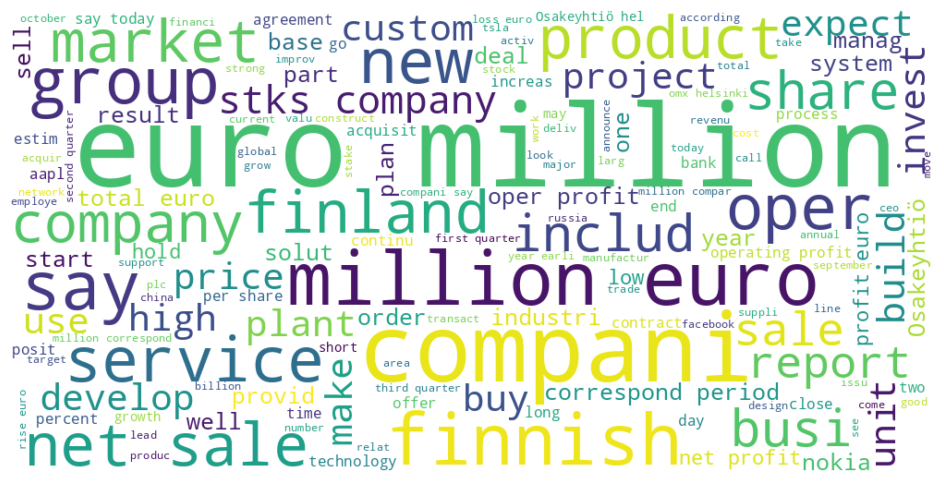

In [117]:
print("Generating WordCloud from cleaned text...")
all_text = ' '.join([' '.join(tokens) for tokens in df['normalized_tokens']])

if all_text.strip():
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='viridis',
        max_words=150
    ).generate(all_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No text available to generate WordCloud.")

Labeling Data

In [111]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df_filtered['vader_scores'] = df_filtered['normalized_tokens'].apply(
    lambda x: sia.polarity_scores(' '.join(x))['compound']
)

def get_binary_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:

        return None


df_filtered['sentiment_label_vader'] = df_filtered['vader_scores'].apply(get_binary_sentiment_label)

# Tampilkan hasil VADER dan label
display(df_filtered[['normalized_tokens', 'vader_scores', 'sentiment_label_vader']].head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,normalized_tokens,vader_scores,sentiment_label_vader
0,"[geosolutions, technology, leverage, benefon, ...",0.0000,None
1,"[esi, low, bank, real, possibl]",-0.2732,negative
2,"[last, quarter, componenta, net, sale, doubl, ...",0.1531,positive
5,"[spy, surpris, see, green, close]",0.0000,None
6,"[shell, billion, bg, deal, meets, shareholder,...",-0.2500,negative
7,"[ssh, communications, security, corp, stock, e...",0.0258,None
8,"[kone, net, sale, rise, year, year, first, nin...",0.0000,None
10,"[circulation, revenu, increas, finland, sweden]",0.0000,None
11,"[sap, q, disappoint, softwar, licens, real, pr...",-0.4215,negative
12,"[subdivis, make, sale, revenu, last, year, eur...",0.4404,positive


Teks Vectorization

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df_filtered['normalized_text_string'] = df_filtered['normalized_tokens'].apply(lambda tokens: ' '.join(tokens))


tfidf_vectorizer_ngram = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))


tfidf_matrix_ngram = tfidf_vectorizer_ngram.fit_transform(df_filtered['normalized_text_string'])

print("Ukuran matriks TF-IDF dengan N-gram (untuk data filter):", tfidf_matrix_ngram.shape)

sentiment_mapping_binary = {'negative': 0, 'positive': 1}
df_filtered['sentiment_numeric_binary'] = df_filtered['Sentiment'].map(sentiment_mapping_binary) # Menggunakan label asli dari df_filtered


df_cleaned_binary = df_filtered.dropna(subset=['sentiment_numeric_binary']).copy()

df_cleaned_binary.reset_index(drop=True, inplace=True)


X_binary = tfidf_matrix_ngram
y_binary = df_cleaned_binary['sentiment_numeric_binary']

# Split data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

Ukuran matriks TF-IDF dengan N-gram (untuk data filter): (2712, 5000)


Splitting Data

In [109]:
from sklearn.model_selection import train_test_split

sentiment_mapping = {'negative': 0, 'positive': 1}
df['sentiment_numeric'] = df['sentiment_label'].map(sentiment_mapping)


df_cleaned = df.dropna(subset=['sentiment_numeric']).copy()

X = tfidf_matrix
y = df_cleaned['sentiment_numeric']


valid_indices = df_cleaned.index

X_cleaned = tfidf_matrix[valid_indices]


X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.1, random_state=42, stratify=y)

print("\nUkuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran label data latih (y_train):", y_train.shape)
print("Ukuran label data uji (y_test):", y_test.shape)


Ukuran data latih (X_train): (2650, 5000)
Ukuran data uji (X_test): (295, 5000)
Ukuran label data latih (y_train): (2650,)
Ukuran label data uji (y_test): (295,)


## Data Modeling

In [29]:
# Berikan Penjelasan tentang model yang dipilih

Model yang digunakan pada Analisis ini adalah Naïve Bayes

Model Naïve Bayes merupakan algoritma klasifikasi berbasis probabilitas
yang didasarkan pada Teorema Bayes. Algoritma ini mengasumsikan bahwa
setiap fitur (kata) bersifat independen satu sama lain terhadap kelasnya.
Dalam analisis sentimen, Naïve Bayes menghitung peluang suatu teks termasuk
ke dalam kategori positif, negatif, atau netral berdasarkan kemunculan kata-kata di dalam teks tersebut.

Kelebihan model ini adalah proses pelatihan yang cepat, sederhana,
dan efektif untuk data teks dengan dimensi tinggi seperti hasil TF-IDF.
Oleh karena itu, Naïve Bayes banyak digunakan sebagai baseline model
pada analisis sentimen.

In [103]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()

model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

print("Model Naive Bayes telah dilatih dan prediksi pada data uji telah dibuat.")

Model Naive Bayes telah dilatih dan prediksi pada data uji telah dibuat.


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix
# 2. Laporann Klasifikasi (Classification report)

1. Confussion Matrix

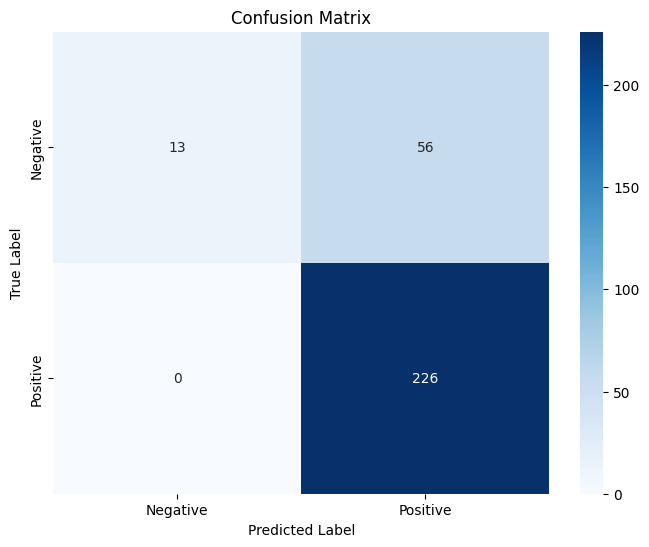

In [104]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nb)

labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

2. Classification Report

In [105]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive'])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.19      0.32        69
    Positive       0.80      1.00      0.89       226

    accuracy                           0.81       295
   macro avg       0.90      0.59      0.60       295
weighted avg       0.85      0.81      0.76       295



## Data Prediksi

In [107]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

print("Starting prediction on new, unseen posts...")

new_posts = [
    "The stock market shows a positive growth this quarter.",
    "The company's financial report was disappointing.",
    "Investors are hopeful after the interest rate cut.",
    "Unemployment rates are still rising despite new policies."
]

print(f"\nPredicting sentiment for {len(new_posts)} new posts...\n")

def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return None

for text in new_posts:
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    label = get_sentiment_label(compound)

    print(f"Original Text   : {text}")
    print(f"Compound Score  : {compound}")
    print(f"Predicted Label : {label}")
    print("-" * 50)

Starting prediction on new, unseen posts...

Predicting sentiment for 4 new posts...

Original Text   : The stock market shows a positive growth this quarter.
Compound Score  : 0.7351
Predicted Label : positive
--------------------------------------------------
Original Text   : The company's financial report was disappointing.
Compound Score  : -0.4939
Predicted Label : negative
--------------------------------------------------
Original Text   : Investors are hopeful after the interest rate cut.
Compound Score  : 0.6369
Predicted Label : positive
--------------------------------------------------
Original Text   : Unemployment rates are still rising despite new policies.
Compound Score  : -0.4404
Predicted Label : negative
--------------------------------------------------


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
